In [8]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from datetime import datetime 
import datetime
from alpaca_trade_api.rest import REST, TimeFrame
import tweepy
%matplotlib inline
from pathlib import Path
import csv
import re
import emoji
import nltk
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import spacy
from spacy import displacy
import warnings
import numpy as np
import pandas as pd
import hvplot.pandas
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from numpy.random import seed
#seed(1)
from tensorflow import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from IPython.display import Image
from IPython.core.display import HTML 
import panel as pn
pn.extension('plotly')
from PIL import Image
from sklearn.metrics import roc_curve, auc
#random.set_seed(2)
warnings.filterwarnings('ignore')
nltk.download('vader_lexicon')
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sameerlakhe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Load .env enviroment variables
load_dotenv()
asset_base_url = "https://api.opensea.io/api/v1/assets"
collection_slug="boredapeyachtclub"
opensea_api_key = os.getenv("opensea_api_key")
# define headers as global variable it is used in multiple get API calls
headers = {
        "Accept": "application/json",
        "X-API-KEY": opensea_api_key
    }
#this function will invoke opensea API to get different assets in the NFT collection
# it takes the collection name and the limit of assets to be fetched
def get_asset(collection_slug,limit):
    query = { 
        "include_orders":False,
        "collection_slug":collection_slug,
        "limit":limit
    }
    response = requests.request("GET", asset_base_url, headers=headers,params=query)
    return response.json()


print(opensea_api_key)

9796bf59fe674cae9688a1a9bb422338


In [34]:
asset_limit=200
bayc_assets_data=get_asset(collection_slug,asset_limit)
#print(json.dumps(doodle_assets,indent=4))
bayc_assets = bayc_assets_data["assets"]
#print(json.dumps(doodle_assets,indent=4))

#this function will iterater over the asset json data and get the thumbnail image URL
# it will return a list of thumbnail URLs
def get_asset_image_urls(assets):
    asset_image_urls=[]
    for asset in assets:
        asset_image_thumbnail_url = asset["image_thumbnail_url"]
        if asset_image_thumbnail_url is not None:
            asset_image_urls.append(asset_image_thumbnail_url)
    return asset_image_urls

asset_image_urls = get_asset_image_urls(bayc_assets)


#this method will pick random thumbnail URLs from the list and fetch images using the URL
# it will create a panel row with the images and add the row to the panel column
# and will return the column
def create_panel(asset_image_urls,total_images_to_display):
    image_rows = pn.Row()
    image_urls = get_unique_image_urls(asset_image_urls,total_images_to_display)
    for i in range(0,len(image_urls)):
        random_url = np.random.choice(asset_image_urls)
        im = Image.open(requests.get(random_url, stream=True).raw)
        fig = get_image_figure(im)
        image_rows.append(fig)
    panel_column = pn.Column(image_rows)
    return panel_column

def get_unique_image_urls(asset_image_urls,total_images_to_display):
    image_urls = set()
    while (len(image_urls)<total_images_to_display):
        image_urls.add(np.random.choice(asset_image_urls))
    return image_urls

#this function takes the image object and wraps it in a figure and returns
# the figure 
def get_image_figure(image):
    fig=plt.figure(figsize=(3.5,3.5))
    plt.imshow(image)
    plt.close(fig)
    return fig

create_panel(asset_image_urls,total_images_to_display)

asset_limit=100
total_images_to_display=3

# this is a function that consolidates all above functions 
# i.e 1) fetch asset data 2) get image URL from response JSON 3) create image and add it to panel
def display_colleaction_assets(collection_slug,asset_limit,total_images_to_display):
    collection_slug_assets_data=get_asset(collection_slug,asset_limit)
    collection_slug_assets = collection_slug_assets_data["assets"]
    asset_image_urls = get_asset_image_urls(collection_slug_assets)
    panel = create_panel(asset_image_urls,total_images_to_display)
    return panel

Column
    [0] Row
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
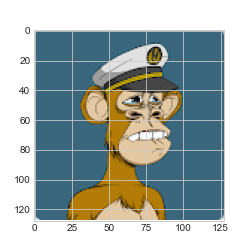
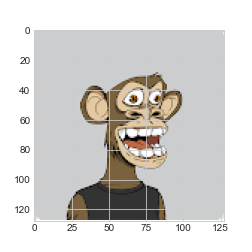
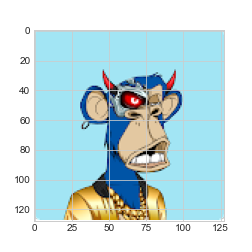

In [35]:
#invoke the function with the collection name and display 
# random thumbnails of the NFTs in the collection
panel = display_colleaction_assets(collection_slug,asset_limit,total_images_to_display)
panel

In [38]:
# Load .env enviroment variables
load_dotenv()
bearer_token =  os.getenv('TWITTER_BEARER_TOKEN')
api_key =  os.getenv('TWITTER_API_KEY')
api_secret_key =  os.getenv('TWITTER_SECRET_KEY')
access_token =  os.getenv('TWITTER_ACCESS_TOKEN')
access_secret_token =  os.getenv('TWITTER_SECRET_TOKEN')

#keys for essential acccess
def get_api_keys():
    api_key =  os.getenv('TWITTER_API_KEY')
    api_secret_key =  os.getenv('TWITTER_SECRET_KEY')
    bearer_token =  os.getenv('TWITTER_BEARER_TOKEN')
    access_token =  os.getenv('TWITTER_ACCESS_TOKEN')
    access_secret_token =  os.getenv('TWITTER_SECRET_TOKEN')
    return api_key,api_secret_key,bearer_token,access_token,access_secret_token

def get_api_keys1():
    api_key =  os.getenv('access_token')
    api_secret_key =  os.getenv('access_token_secret')
    bearer_token =  os.getenv('bearer_token1')
    access_token =  os.getenv('consumer_key')
    access_secret_token =  os.getenv('consumer_secret')
    return api_key,api_secret_key,bearer_token,access_token,access_secret_token

#getApiKeys1 have the elevated access to  twitter API
api_key,api_secret_key,bearer_token,access_token,access_secret_token = get_api_keys1()


In [39]:
url = "https://api.twitter.com/2/tweets/1535608320211427329?tweet.fields=created_at,attachments&expansions=author_id"

payload={}
headers = {
  'id': '1228393702244134912',
  'Authorization': 'Bearer '+ bearer_token,
  'Cookie': 'guest_id=v1%3A165495549908649152'
}

response = requests.request("GET", url, headers=headers, data=payload)
json_response = response.text
print(json_response)

{"data":{"created_at":"2022-06-11T13:02:08.000Z","author_id":"164425558","attachments":{"media_keys":["3_1535608317837443073"]},"text":"On this day in 1980: Steve Ballmer became Microsoft employee #24.\n\nHis shares are now worth $81 billion. https://t.co/tHc8wtldIG","id":"1535608320211427329"},"includes":{"users":[{"id":"164425558","name":"Jon Erlichman","username":"JonErlichman"}]}}


In [40]:
query = "BAYC"
client = tweepy.Client(bearer_token=bearer_token)
counts = client.get_recent_tweets_count(query=query,granularity="day")
for count in counts.data:
    print(count)

{'end': '2022-06-10T00:00:00.000Z', 'start': '2022-06-09T22:40:42.000Z', 'tweet_count': 863}
{'end': '2022-06-11T00:00:00.000Z', 'start': '2022-06-10T00:00:00.000Z', 'tweet_count': 42091}
{'end': '2022-06-12T00:00:00.000Z', 'start': '2022-06-11T00:00:00.000Z', 'tweet_count': 23580}
{'end': '2022-06-13T00:00:00.000Z', 'start': '2022-06-12T00:00:00.000Z', 'tweet_count': 39051}
{'end': '2022-06-14T00:00:00.000Z', 'start': '2022-06-13T00:00:00.000Z', 'tweet_count': 26749}
{'end': '2022-06-15T00:00:00.000Z', 'start': '2022-06-14T00:00:00.000Z', 'tweet_count': 16714}
{'end': '2022-06-16T00:00:00.000Z', 'start': '2022-06-15T00:00:00.000Z', 'tweet_count': 20142}
{'end': '2022-06-16T22:40:42.000Z', 'start': '2022-06-16T00:00:00.000Z', 'tweet_count': 32349}


In [41]:
def create_tweet(text):
    client = tweepy.Client(consumer_key=api_key,
        consumer_secret=api_secret_key,
        access_token=access_token,
        access_token_secret=access_secret_token)
    response=client.create_tweet(text=text)

#create_tweet("Hello World!")

In [47]:
def determine_file_name(query,start_date):
    file_name = "Data/"+query+"_"+start_date.strftime('%Y-%m-%d')+".csv"
    return file_name

In [43]:
#this function writes the event data to a csv file to avoid calling the API multiple times
def write_csv(data_list, file_name):
    with open(file_name, mode='w', encoding='utf-8', newline='\n') as f:
        header = "Tweets"
        f.write("%s\n" % header)
        for data in data_list:
            f.write("%s\n" % data)

In [44]:
def remove_emoji(string):
    return emoji.get_emoji_regexp().sub(u'', string)

nltk.download('words')
words = set(nltk.corpus.words.words())


def remove_non_english_words(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

def sanitize_tweet(tweet):
    sanitzed_tweet = tweet.replace("\n", " ")
    sanitzed_tweet = re.sub(r'@[A-za-z0-9]+','',sanitzed_tweet)
    sanitzed_tweet = re.sub(r'#','',sanitzed_tweet)
    sanitzed_tweet = re.sub(r'RT[\s]','',sanitzed_tweet)
    sanitzed_tweet = re.sub(r'https?:\/\/\S+','',sanitzed_tweet)
    sanitzed_tweet = re.sub(r',+','',sanitzed_tweet)
    #sanitzed_tweet = re.sub(r'✅+','',sanitzed_tweet)
    #sanitzed_tweet = re.sub(r'🚨+','',sanitzed_tweet)
    #sanitzed_tweet = remove_emoji(sanitzed_tweet)
    #sanitzed_tweet = remove_non_english_words(sanitzed_tweet)
    sanitzed_tweet =  re.sub('[^A-Za-z0-9]+', ' ', sanitzed_tweet)
    return sanitzed_tweet

def remove_duplicates(tweet_list):
    unique_lines = set()
    for tweet in tweet_list:
        unique_lines.add(tweet)
    return list(unique_lines)  

[nltk_data] Downloading package words to
[nltk_data]     /Users/sameerlakhe/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [48]:
#get the max data
limit = 50
max_results = 100
tweet_list=[]
progress_indicator_size=50
startDate = "2022-06-16"
start_date = datetime.datetime(2022, 6, 16, 0,0, 0)


def search_tweets(query,start_date,reload=False):
    client = tweepy.Client(bearer_token=bearer_token)
    file_name = determine_file_name(query,start_date)
    path = Path(file_name)
    
    i=1
    if (reload == False and path.is_file()):
        print(f'The file {file_name} exists')
        nft_df = pd.read_csv(file_name)
        return nft_df
    else:
        for tweet in tweepy.Paginator(client.search_recent_tweets,query=query,
                                      start_time=start_date,
                                      tweet_fields = [ 'created_at'],
                                      max_results=max_results).flatten(limit=limit):
            #print(str(i) +")" + tweet.text)
            i=i+1
            tweet_date = tweet.created_at
            print(f"tweet_date:{tweet_date}")
            sanitized_tweet = sanitize_tweet(tweet.text)
            tweet_list.append(sanitized_tweet)
            if(i%progress_indicator_size)==0:
                print(f"Number of tweets fetched..:{i}")
        #once the list is generated, write it to file
        unique_tweet_list = remove_duplicates(tweet_list)
        write_csv(unique_tweet_list,file_name)
    #return list as a dataframe
    return pd.DataFrame(unique_tweet_list)

query = "BAYC"
is_reload_needed = True
bayc_tweet_df = search_tweets(query,start_date,is_reload_needed)

pd.set_option('max_colwidth', 800)
bayc_tweet_df


tweet_date:2022-06-16 22:42:28+00:00
tweet_date:2022-06-16 22:42:23+00:00
tweet_date:2022-06-16 22:42:22+00:00
tweet_date:2022-06-16 22:42:17+00:00
tweet_date:2022-06-16 22:42:06+00:00
tweet_date:2022-06-16 22:41:53+00:00
tweet_date:2022-06-16 22:41:51+00:00
tweet_date:2022-06-16 22:41:44+00:00
tweet_date:2022-06-16 22:41:41+00:00
tweet_date:2022-06-16 22:41:30+00:00
tweet_date:2022-06-16 22:41:28+00:00
tweet_date:2022-06-16 22:41:24+00:00
tweet_date:2022-06-16 22:41:22+00:00
tweet_date:2022-06-16 22:41:22+00:00
tweet_date:2022-06-16 22:41:21+00:00
tweet_date:2022-06-16 22:41:19+00:00
tweet_date:2022-06-16 22:41:18+00:00
tweet_date:2022-06-16 22:41:12+00:00
tweet_date:2022-06-16 22:41:07+00:00
tweet_date:2022-06-16 22:40:56+00:00
tweet_date:2022-06-16 22:40:55+00:00
tweet_date:2022-06-16 22:40:48+00:00
tweet_date:2022-06-16 22:40:44+00:00
tweet_date:2022-06-16 22:40:40+00:00
tweet_date:2022-06-16 22:40:39+00:00
tweet_date:2022-06-16 22:40:33+00:00
tweet_date:2022-06-16 22:40:25+00:00
t

,0
0,Lol nah he staked over on CDC
1,Listening to your interview with futurefi and I want to buy more RR BAYC Very Bullish on your project
2,BAYC went to NYC and started tagging their logo on top of work from legendary graffiti artists This is so corny
3,APEFEST 2022 SABET x Available for 7 Days at 0 20 If you hold this piece in NFT NYC and we meet I ll paint you
4,16Jun Monkey and Duck are friends and look out for each other QUACK ApeFollowApe DuckFollowDuck BAYC ODYC https
5,when you see a BAYC image thats been reminted as an RR BAYC image the meaning entirely changes Something that is crass an
6,REVEAL IS HERE Mint 1 Trolltown within 24 hours of reveal to get a fractionalized Mutant BAYC worth 3200 TO
7,Have you noticed nobody cares about what you saying lol it s like if you saying mmf it s a scam cause of how high it was and look at the price now lol
8,Just bought myself a BAYC pretty fkn stoked Nice to be apart of the community BAYC BAYC9545 apefollowape yugal
9,0x57ab b464 fumbled BAYC 1870 status No Hands in 133 88 WETH out 90 WETH hodl 1 month 23 days loss 43 88 ETH spent 396686 04 2022 lost 285446 72


In [179]:
#query = "NFT"
#is_reload_needed = False
#tweet_df = search_tweets1(query,is_reload_needed)
#tweet_df

To score a review comment as positive or negative, we will use the compound polarity score; The compound score ranges between -1 (most extreme negative) and +1 (most extreme positive). Following the recommendations from the research paper (link below), we will define a threshold of 0.1 to label a review as positive, if the compound score is greater than or equal to 0.1, the review comment will be positive , if the compound score is below 0.1, the review comment will be negative 

Research paper link - https://scholar.smu.edu/cgi/viewcontent.cgi?article=1051&context=datasciencereview

In [213]:
#dictionary to store the sentiment scores of the article
tweet_sentiment = {
        "tweet_compound": [],
        "tweet_pos": [],
        "tweet_neu": [],
        "tweet_neg": [],
        "tweet_sent": [],
        "sentiment_score": [],
        }

analyzer = SentimentIntensityAnalyzer()

def convert_tweet_sentiment_score(tweet_sentiment_score):
    binary_score = 0
    
    if(tweet_sentiment_score > 0.1):
        binary_score =1 
    
    #print(f"tweet_sentiment_score:{tweet_sentiment_score},binary_score:{binary_score}")
    return binary_score
    
# Get sentiment for the tweet
def get_sentiment_score(tweet_df):
    
    for index, row in tweet_df.iterrows():
        try:
            # Sentiment scoring with VADER
            text_sentiment = analyzer.polarity_scores(row["Tweets"])
            tweet_sentiment["tweet_compound"].append(text_sentiment["compound"])
            tweet_sentiment["tweet_pos"].append(text_sentiment["pos"])
            tweet_sentiment["tweet_neu"].append(text_sentiment["neu"])
            tweet_sentiment["tweet_neg"].append(text_sentiment["neg"])
            tweet_sentiment_score = text_sentiment["compound"]
            tweet_sentiment["tweet_sent"].append(tweet_sentiment_score)
            classification_score = convert_tweet_sentiment_score(float(tweet_sentiment_score))
            #print(f"classification_score:{classification_score}")
            tweet_sentiment["sentiment_score"].append(classification_score)
        except AttributeError:
            pass
        
    return tweet_sentiment

    
# Attaching sentiment columns to the News DataFrame
tweet_sentiment = get_sentiment_score(bayc_tweet_df)
tweet_sentiment_df = pd.DataFrame(tweet_sentiment)
bayc_tweet_sentiment_df = bayc_tweet_df.join(tweet_sentiment_df)
bayc_tweet_sentiment_df.head()

,Tweets,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent,sentiment_score
0,GACC IS LIVE for WAGMI Wednesday All MACC details have been revealed what are you thoughts on the price and schedule,0.0000,0.000,1.000,0.0,0.0000,0
1,bayc better than goblins,0.4404,0.492,0.508,0.0,0.4404,1
2,Original music by dope artists is a cooler use case than BAYC MAYC Don t me,0.3182,0.150,0.850,0.0,0.3182,1
3,bayc rules,0.0000,0.000,1.000,0.0,0.0000,0
4,Just recorded a video yesterday which will release tomorrow where I mentioned BAYC could reach 100 ETH floor price in t,0.0258,0.061,0.939,0.0,0.0258,0


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sameerlakhe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('bayc', 11), ('ape', 6), ('nft', 5), ('mayc', 4), ('premint', 4), ('project', 3), ('nfts', 3), ('floor', 3), ('like', 2), ('eth', 2)]


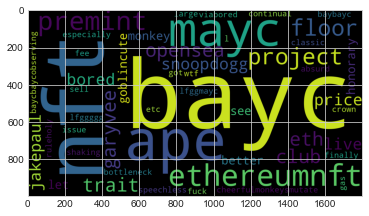

In [188]:
nltk.download('omw-1.4')
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

# Create a new tokens column for Bitcoin
def generate_tokens(df):
    list_tokens=[]
    for row in df["Tweets"]:
        tokens = tokenizer(row)
        list_tokens.append(tokens)
    return list_tokens

bayc_tokens = generate_tokens(bayc_tweet_df)
bayc_tweet_df['tokens'] = bayc_tokens
bayc_tweet_df.head()

#concat data from all the rows for tokens column
def get_big_token_string(df):
    big_str=''
    for row in df["tokens"]:
        list_string = ' '.join(row)
        big_str = big_str + list_string
    return big_str

# Generate the Bitcoin N-grams where N=2
big_string_bayc_tokens = get_big_token_string(bayc_tweet_df)
bayc_tokens = big_string_bayc_tokens.split()
bayc_bigram_counts = Counter(ngrams(bayc_tokens, n=2))

# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

# Use token_count to get the top 10 words for Bitcoin
bayc_top_words = token_count(bayc_tokens,10)
print(bayc_top_words)

# Generate the Bitcoin word cloud
wc_bayc = WordCloud(width=1800, height=1000, max_words=50).generate(big_string_bayc_tokens)
plt.imshow(wc_bayc)

In [216]:
bayc_learing_df = bayc_tweet_sentiment_df.copy()
bayc_learing_df = bayc_learing_df[["Tweets","sentiment_score"]]
bayc_learing_df

,Tweets,sentiment_score
0,GACC IS LIVE for WAGMI Wednesday All MACC details have been revealed what are you thoughts on the price and schedule,0
1,bayc better than goblins,1
2,Original music by dope artists is a cooler use case than BAYC MAYC Don t me,1
3,bayc rules,0
4,Just recorded a video yesterday which will release tomorrow where I mentioned BAYC could reach 100 ETH floor price in t,0
5,bayc gt goblins,1
6,The Biggest BAYC Giveaway Claim Your BAYC Now,0
7,GM the best thing about even if you plebs have to sell you monkey PFP cos they are worthless I will still,1
8,ppl held their apes at 1k eth they ll hold their apes at 500 eth others joined the club BAYC MAYC gonna thrive thru the bear market,0
9,ad MAYC 19 ETH 34000 GIVEAWAY mints in 24 hours and is giving away a BAYC NFT worth over 34000 To,1


In [220]:
# Create the features set (X) and the target vector (y)
X = bayc_learing_df["Tweets"].values
y = bayc_learing_df["sentiment_score"].values

In [221]:
# Create the train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

***Scoring Sentiment Using RNN LSTM***

Build an RNN LSTM model to score the sentiment of the review comments. You will fit the model using the training and validations sets, and finally, you will get some predictions using the testing set 

In [223]:
# Create an instance of the Tokenizer and fit it with the X text data
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)

In [224]:
# Print the first five elements of the encoded vocabulary
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")

word: 'bayc', token: 1
word: 'the', token: 2
word: 'eth', token: 3
word: 'is', token: 4
word: 'for', token: 5


In [226]:
#To fit the RNN LSTM model for sentiment scoring, the text data in X should be encoded 
#as sequences. Use the text_to_sequence() method of the tokenizer to transform
#the text data to numerical sequences and save the sequences in a variable called X_seq
# Transform the text data to numerical sequences
X_seq = tokenizer.texts_to_sequences(X)
#For testing proposes, compare the text representation of a movie review with its 
#numerical representation, by printing the first text review in X and the first encoded element in X_seq

# Contrast a sample numerical sequence with its text version
print("**Text comment**")
print({X[0]})
print("**Numerical sequence representation**")
print(X_seq[0])

**Text comment**
{' GACC IS LIVE for WAGMI Wednesday All MACC details have been revealed what are you thoughts on the price and schedule '}
**Numerical sequence representation**
[30, 4, 31, 5, 32, 33, 34, 35, 36, 14, 37, 38, 39, 15, 6, 40, 16, 2, 7, 17, 41]


In [229]:
#RNN LSTM models need equal size inputs, so that, pad the sequences 
#stored in X_pad up to 140 integers using the pad_sequences method from Keras. 
#Store the pad size in a variable called max_words.Note: You may use a bigger padding size;
#however, using a bigger value will increase the time that takes fitting the RNN LSTM model
# Set the pad size
max_words = 140

# Pad the sequences using the pad_sequences() method
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")


In [230]:
#Create the Training, Validation, and Testing Sets
#Create suitable training, validation, and testing sets for fitting and testing 
#the RNN LSTM model using the encoded review comments.
#Use the train_test_split method from sklearn to create these sets
# Creating training, validation, and testing sets using the encoded data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y)

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [232]:
#Build and Train the RNN LSTM Model
#We use Embedding layers to analyze text data in RNN LSTM models,
#so this section starts by setting-up some initial variables needed for the RNN LSTM to 
#score sentiment.As it's defined in the Embedding layer documentation of the Keras API, 
#set the input_dim parameter to the size of your vocabulary, 
#so we set the vocabulary_size variable to the length of the number of words in the
#tokenizer plus 1.Also, we define a variable called embedding_size to specify how
#many dimensions will be used to represent each word.
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
embedding_size = 64


***Define an RNN LSTM model as follows:***
- Layer 1: Add an Embedding layer using the vocabulary_size and embedding_size variables as the first two parameters, and setting input_length=max_words (the same size as the padding).
- Layer 2: Add an LSTM layer with 280 units.Output Layer: Add a Dense layer with 1 unit and sigmoid as activation function.

In [233]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=280))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

2022-06-16 00:39:01.907929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [238]:
#Compile the model using the binary_crossentropy loss function, the adam optimizer, 
#and fetch the following metrics: Accuracy, True positives, True negatives,
#False positives, False negatives, Precision, Recall,and AUC.

# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [239]:
#Display the summary of the model using the summary method of the model.
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 64)           8896      
                                                                 
 lstm (LSTM)                 (None, 280)               386400    
                                                                 
 dense (Dense)               (None, 1)                 281       
                                                                 
Total params: 395,577
Trainable params: 395,577
Non-trainable params: 0
_________________________________________________________________


In [240]:
#Train the RNN LSTM model using a batch size equals to 1000 and ten epochs. 
#Remember to set the validation_data parameter to use your validation sets.
# Training the model
batch_size = 1000
epochs = 10
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6939 - accuracy: 0.3750 - tp: 3.0000 - tn: 0.0000e+00 - fp: 5.0000 - fn: 0.0000e+00 - precision: 0.3750 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.7099 - val_accuracy: 0.3333 - val_tp: 0.0000e+00 - val_tn: 1.0000 - val_fp: 0.0000e+00 - val_fn: 2.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 143ms/step - loss: 0.6825 - accuracy: 0.6250 - tp: 0.0000e+00 - tn: 5.0000 - fp: 0.0000e+00 - fn: 3.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.7350 - val_accuracy: 0.3333 - val_tp: 0.0000e+00 - val_tn: 1.0000 - val_fp: 0.0000e+00 - val_fn: 2.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 142ms/step - loss: 0.6720 - accuracy: 0.6250 - tp: 0.0000e+00 - tn: 5.0000 - fp: 0.0000e+00 - fn: 3.0000 - precision: 0.0000e+00 - recall: 0.0000e

In [241]:
# Predict classes using the testing data
y_rnn_pred = model.predict(X_test_rnn) > 0.5

1/1 [==============================] - 0s 426ms/step


In [243]:
print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test_rnn, y_rnn_pred)))

RNN LSTM Accuracy 0.75


In [245]:
#Confusion Matrix
#Scoring the sentiment of the movie reviews as positive or negative is a binary classification
#problem, so use the confusion_matrix method from sklearn to calculate the confusion matrix
#for the RNN LSTM model.

# Confusion matrtix metrics from the RNN LSTM model
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y_test_rnn, y_rnn_pred).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"
print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

Confusion Matrix from the RNN LSTM Model


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=0,FN=1
Negative(0),FP=0,TN=3


In [247]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



In [250]:
# ROC Curve RNN LSTM
#Use the predict() method from the RNN LSTM model to predict the sentiment of 
#the testing data X_test_rnn. Set batch_size=1000 to speed up the predictions and store 
#the results in a variable called test_predictions_rnn.

# Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test_rnn, batch_size=1000)

# Use the roc_curve method from sklearn to calculate the false positives (fpr)
#and true positives (tpr) rates passing as parameters the testing target sentiments
#(y_test_rnn) and the predictions you compute using the testing data (test_predictions_rnn)
# Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test_rnn, test_predictions_rnn)

1/1 [==============================] - 0s 37ms/step


In [251]:
#After calculating the fpr and tpr for the RNN LSTM Model, use the auc method of sklearn 
#to calculate the AUC for this model.Round the final result up to 4 decimals.
# AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [252]:
# Once you gather all the data needed to plot the ROC curve, 
#create a DataFrame with the fpr and tpr data from the RNN LSTM model
#Dataframe to plot ROC Curve for the RNN LSTM model
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

<AxesSubplot:title={'center':'Test ROC Curve (AUC=0.0)'}, xlabel='FPR Test'>

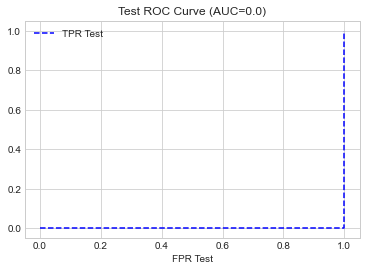

In [253]:
roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)